In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
from matplotlib import pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
def plot_roc_curve(y_test, y_hat_prob): 
    fpr, tpr, thresholds = roc_curve(y_test, y_hat_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

def get_scaler(normalization_type):
    scaler_dict = {
        'minmax': MinMaxScaler,
        'zscore': StandardScaler,
        'robust': RobustScaler
    }
    return scaler_dict[normalization_type]

### Features
- `species`: a factor denoting penguin species (Adélie, Chinstrap and Gentoo)
- `island`: a factor denoting island in Palmer Archipelago, Antarctica (Biscoe, Dream or Torgersen)
- `bill_length_mm`: a number denoting bill length (millimeters)
- `bill_depth_mm`: a number denoting bill depth (millimeters)
- `flipper_length_mm`: an integer denoting flipper length (millimeters)
- `body_mass_g`: an integer denoting body mass (grams)
- `sex`: a factor denoting penguin sex (female, male)

In [17]:
df = sns.load_dataset('penguins')
df.head()

dummy = False
normalization = True
normalization_type = 'zscore' # minmax, zscore, robust
missing_values = 'mode' # mean, median, mode

categorical_features = ['island', 'species']

# use pd.concat to join the new columns with your original dataframe
df = pd.concat([df, pd.get_dummies(df[categorical_features], prefix=['island', 'species'], drop_first=dummy)], axis=1)

# now drop the original 'country' column (you don't need it anymore)
df.drop(categorical_features, axis=1, inplace=True)

# missing data
if missing_values == 'mean':
    df.fillna(df.mean(), inplace=True)
elif missing_values == 'median':
    df.fillna(df.median(), inplace=True)
elif missing_values == 'mode':
     df.fillna(df.mode().squeeze(), inplace=True)
df.dropna(inplace=True)

# converting outputs
df.replace({'Male': 0, 'Female': 1}, inplace=True)

# input-output split
X = df.drop(['sex'], axis=1).values
y = df['sex'].values

In [18]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=42)

# normalization
if normalization:
    scaler = get_scaler(normalization_type)()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

Accuracy rate: 88.41



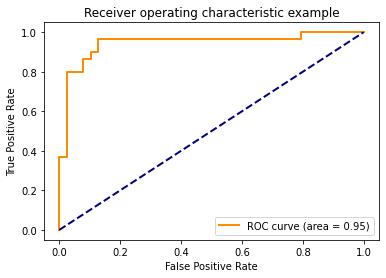

In [19]:
# model creation
model = LogisticRegression()
model.fit(X_train, y_train)

# model evaluation
y_hat = model.predict(X_test)
y_hat_prob = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_hat)
print(f'Accuracy rate: {accuracy*100:.2f}\n')

plot_roc_curve(y_test, y_hat_prob)

In [20]:
kf = KFold(n_splits=10)


accuracy_list = list()
for train_index, test_index in kf.split(X):
    # train-test split
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # normalization
    if normalization:
        scaler = get_scaler(normalization_type)()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
    # model creation
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # model evaluation
    y_hat = model.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_hat))

accuracy = np.mean(accuracy_list)
print(f'Accuracy rate: {accuracy*100:.2f}\n')

Accuracy rate: 88.67

